In [1]:
#Step1: Importing the data
import pandas as pd
bank = pd.read_csv("D:\\Assignment datasets\\bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
list(bank.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
#Splitting the continuous and categorical variables 
X_cont = bank.select_dtypes(['int64','float64'])
X_cat = bank.select_dtypes(object) 

In [7]:
X_cont.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [8]:
X_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [9]:
X_cat['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [10]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}


In [11]:
X_cat = X_cat.replace(order)
X_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,5,unknown,no
1,technician,single,secondary,no,yes,no,unknown,5,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,5,unknown,no
4,unknown,single,unknown,no,no,no,unknown,5,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,11,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,11,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,11,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,11,unknown,no


In [ ]:
#Step2: Transforming the data with one hot encoding and label encoder

In [12]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
X_cat_ohe = OHE.fit_transform(X_cat).toarray()

In [13]:
X_cat_ohe = pd.DataFrame(X_cat_ohe)
X_cat_ohe

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [17]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [18]:
X_cat.iloc[:,0] = LE.fit_transform(X_cat.iloc[:,0])
X_cat.iloc[:,1] = LE.fit_transform(X_cat.iloc[:,1])
X_cat.iloc[:,2] = LE.fit_transform(X_cat.iloc[:,2])
X_cat.iloc[:,3] = LE.fit_transform(X_cat.iloc[:,3])
X_cat.iloc[:,4] = LE.fit_transform(X_cat.iloc[:,4])
X_cat.iloc[:,5] = LE.fit_transform(X_cat.iloc[:,5])
X_cat.iloc[:,6] = LE.fit_transform(X_cat.iloc[:,6])
X_cat.iloc[:,8] = LE.fit_transform(X_cat.iloc[:,8])
X_cat.iloc[:,9] = LE.fit_transform(X_cat.iloc[:,9])

In [19]:
X_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,5,3,0
1,9,2,1,0,1,0,2,5,3,0
2,2,1,1,0,1,1,2,5,3,0
3,1,1,3,0,1,0,2,5,3,0
4,11,2,3,0,0,0,2,5,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,11,3,1
45207,5,0,0,0,0,0,0,11,3,1
45208,5,1,1,0,0,0,0,11,2,1
45209,1,1,1,0,0,0,1,11,3,0


In [20]:
X_cont.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [21]:
#Forming a new data
banknew = pd.concat([X_cont,X_cat], axis=1)

In [22]:
banknew.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,5,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,5,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,5,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,5,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,5,3,0


In [23]:
banknew.corr()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.021868,-0.403240,-0.106807,-0.017879,-0.185513,-0.015655,0.026221,0.092903,0.007367,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.018232,0.002122,0.064514,-0.066745,-0.068768,-0.084350,-0.027273,0.094605,-0.020967,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.022856,-0.005261,0.022671,0.009424,-0.027982,0.011370,-0.027936,0.101989,0.083460,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.004744,0.011852,0.001935,-0.010021,0.005075,-0.012412,-0.020839,-0.011866,0.010925,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.006839,-0.008994,0.006255,0.016822,-0.023599,0.009980,0.019614,0.054868,0.101588,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.024455,0.019172,0.000052,-0.029979,0.124178,-0.022754,-0.244816,-0.108940,-0.858362,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.000911,0.014973,0.017570,-0.018329,0.037076,-0.011043,-0.147811,-0.035600,-0.489752,0.093236
job,-0.021868,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,1.000000,0.062045,0.166707,-0.006853,-0.125363,-0.033004,-0.082063,0.043142,0.011010,0.040438
marital,-0.403240,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.062045,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.050938,-0.016850,0.045588
education,-0.106807,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.166707,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,0.054729,-0.019361,0.066241


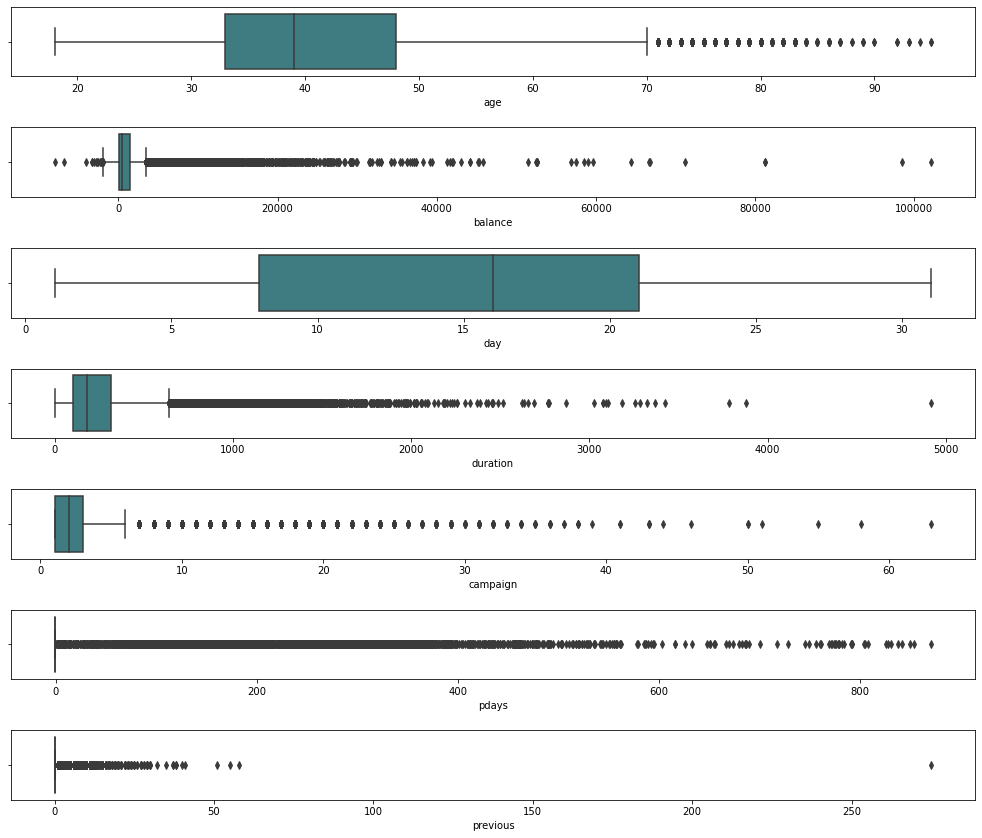

In [25]:
#Step3: EDA
ot = banknew.copy()
import seaborn as sns 
import matplotlib.pyplot as plt 
fig, axes=plt.subplots(7,1, figsize=(14,12),sharex=False, sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#As we can see we have so many outliers and dropping them all will leads to loss of data in very large amount which is not 
#recommended

In [26]:
df_new = banknew.copy()

In [27]:
#Step4: Split dataset in input and output
X=df_new.drop('y',axis=1)    # input
Y=df_new['y']                # output

In [28]:
#Step5: Data partition
# Now Train_test_split
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler
ss_x=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss_x.fit_transform(X_train)
X_test=ss_x.transform(X_test)

In [30]:
X_train

array([[ 0.09881684,  0.42807061, -0.09973222, ...,  1.49797145,
        -0.4733465 ,  0.44805792],
       [-0.37151499,  0.31707647,  0.49973948, ...,  1.49797145,
        -0.05691947,  0.44805792],
       [-0.84184683, -0.14337018,  0.14005646, ..., -0.7181473 ,
        -0.88977353,  0.44805792],
       ...,
       [-0.93591319, -0.47384628,  1.09921117, ..., -0.7181473 ,
         0.77593459,  0.44805792],
       [ 0.85134778, -0.47205606, -1.53846429, ...,  1.49797145,
         0.35950756,  0.44805792],
       [-0.46558136,  1.65938947,  0.73952815, ..., -0.7181473 ,
         1.19236162, -0.55964522]])

In [31]:
#Step6: Model fitting
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [32]:
Y_pred=logreg.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
Y_pred_train = logreg.predict(X_train)
Y_pred_test = logreg.predict(X_test)

In [33]:
#Check accuracy of model use inbuilt method score() of LogisticRegression.
logreg.score(X_test,Y_test)      # Score always varies between 0-1

0.8900685689006856

In [34]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [49]:
#Step7: Metrics
# Confusion Matrix for the model accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_pred_test)
cm

array([[27432,   477],
       [ 3002,   736]], dtype=int64)

In [50]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.61      0.20      0.30      3738

    accuracy                           0.89     31647
   macro avg       0.75      0.59      0.62     31647
weighted avg       0.87      0.89      0.86     31647



In [42]:
ac1 =  accuracy_score(Y_train,Y_pred_train)
ac2 =  accuracy_score(Y_test,Y_pred_test)
print("Training score:", ac1.round(3))
print("Test score:", ac2.round(3))


Training score: 0.892
Test score: 0.89


In [47]:
from sklearn.metrics import recall_score,precision_score,f1_score

rs =  recall_score(Y_test,Y_pred_test)
print("Sensitivity/Recall score:", rs.round(3))

ps =  precision_score(Y_test,Y_pred_test)
print("precision score:", ps.round(3))

f1s =  f1_score(Y_test,Y_pred_test)
print("F1 score:", f1s.round(3))


Sensitivity/Recall score: 0.197
precision score: 0.607
F1 score: 0.297


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


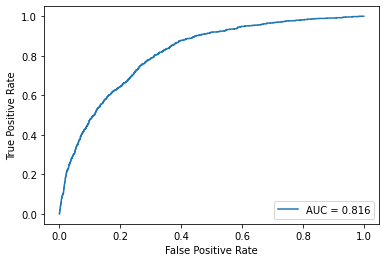

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Prepare the data
X=df_new.drop('y',axis=1)    # input
Y=df_new['y']  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_proba = lr.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()